In [2]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
df = pd.read_csv("Desktop/datasets/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다. 이에 대한 내용은 앞의 데이터 전처리 및 파생변수 생성 부분에서 자세히 다루었기 때문에 생략한다.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


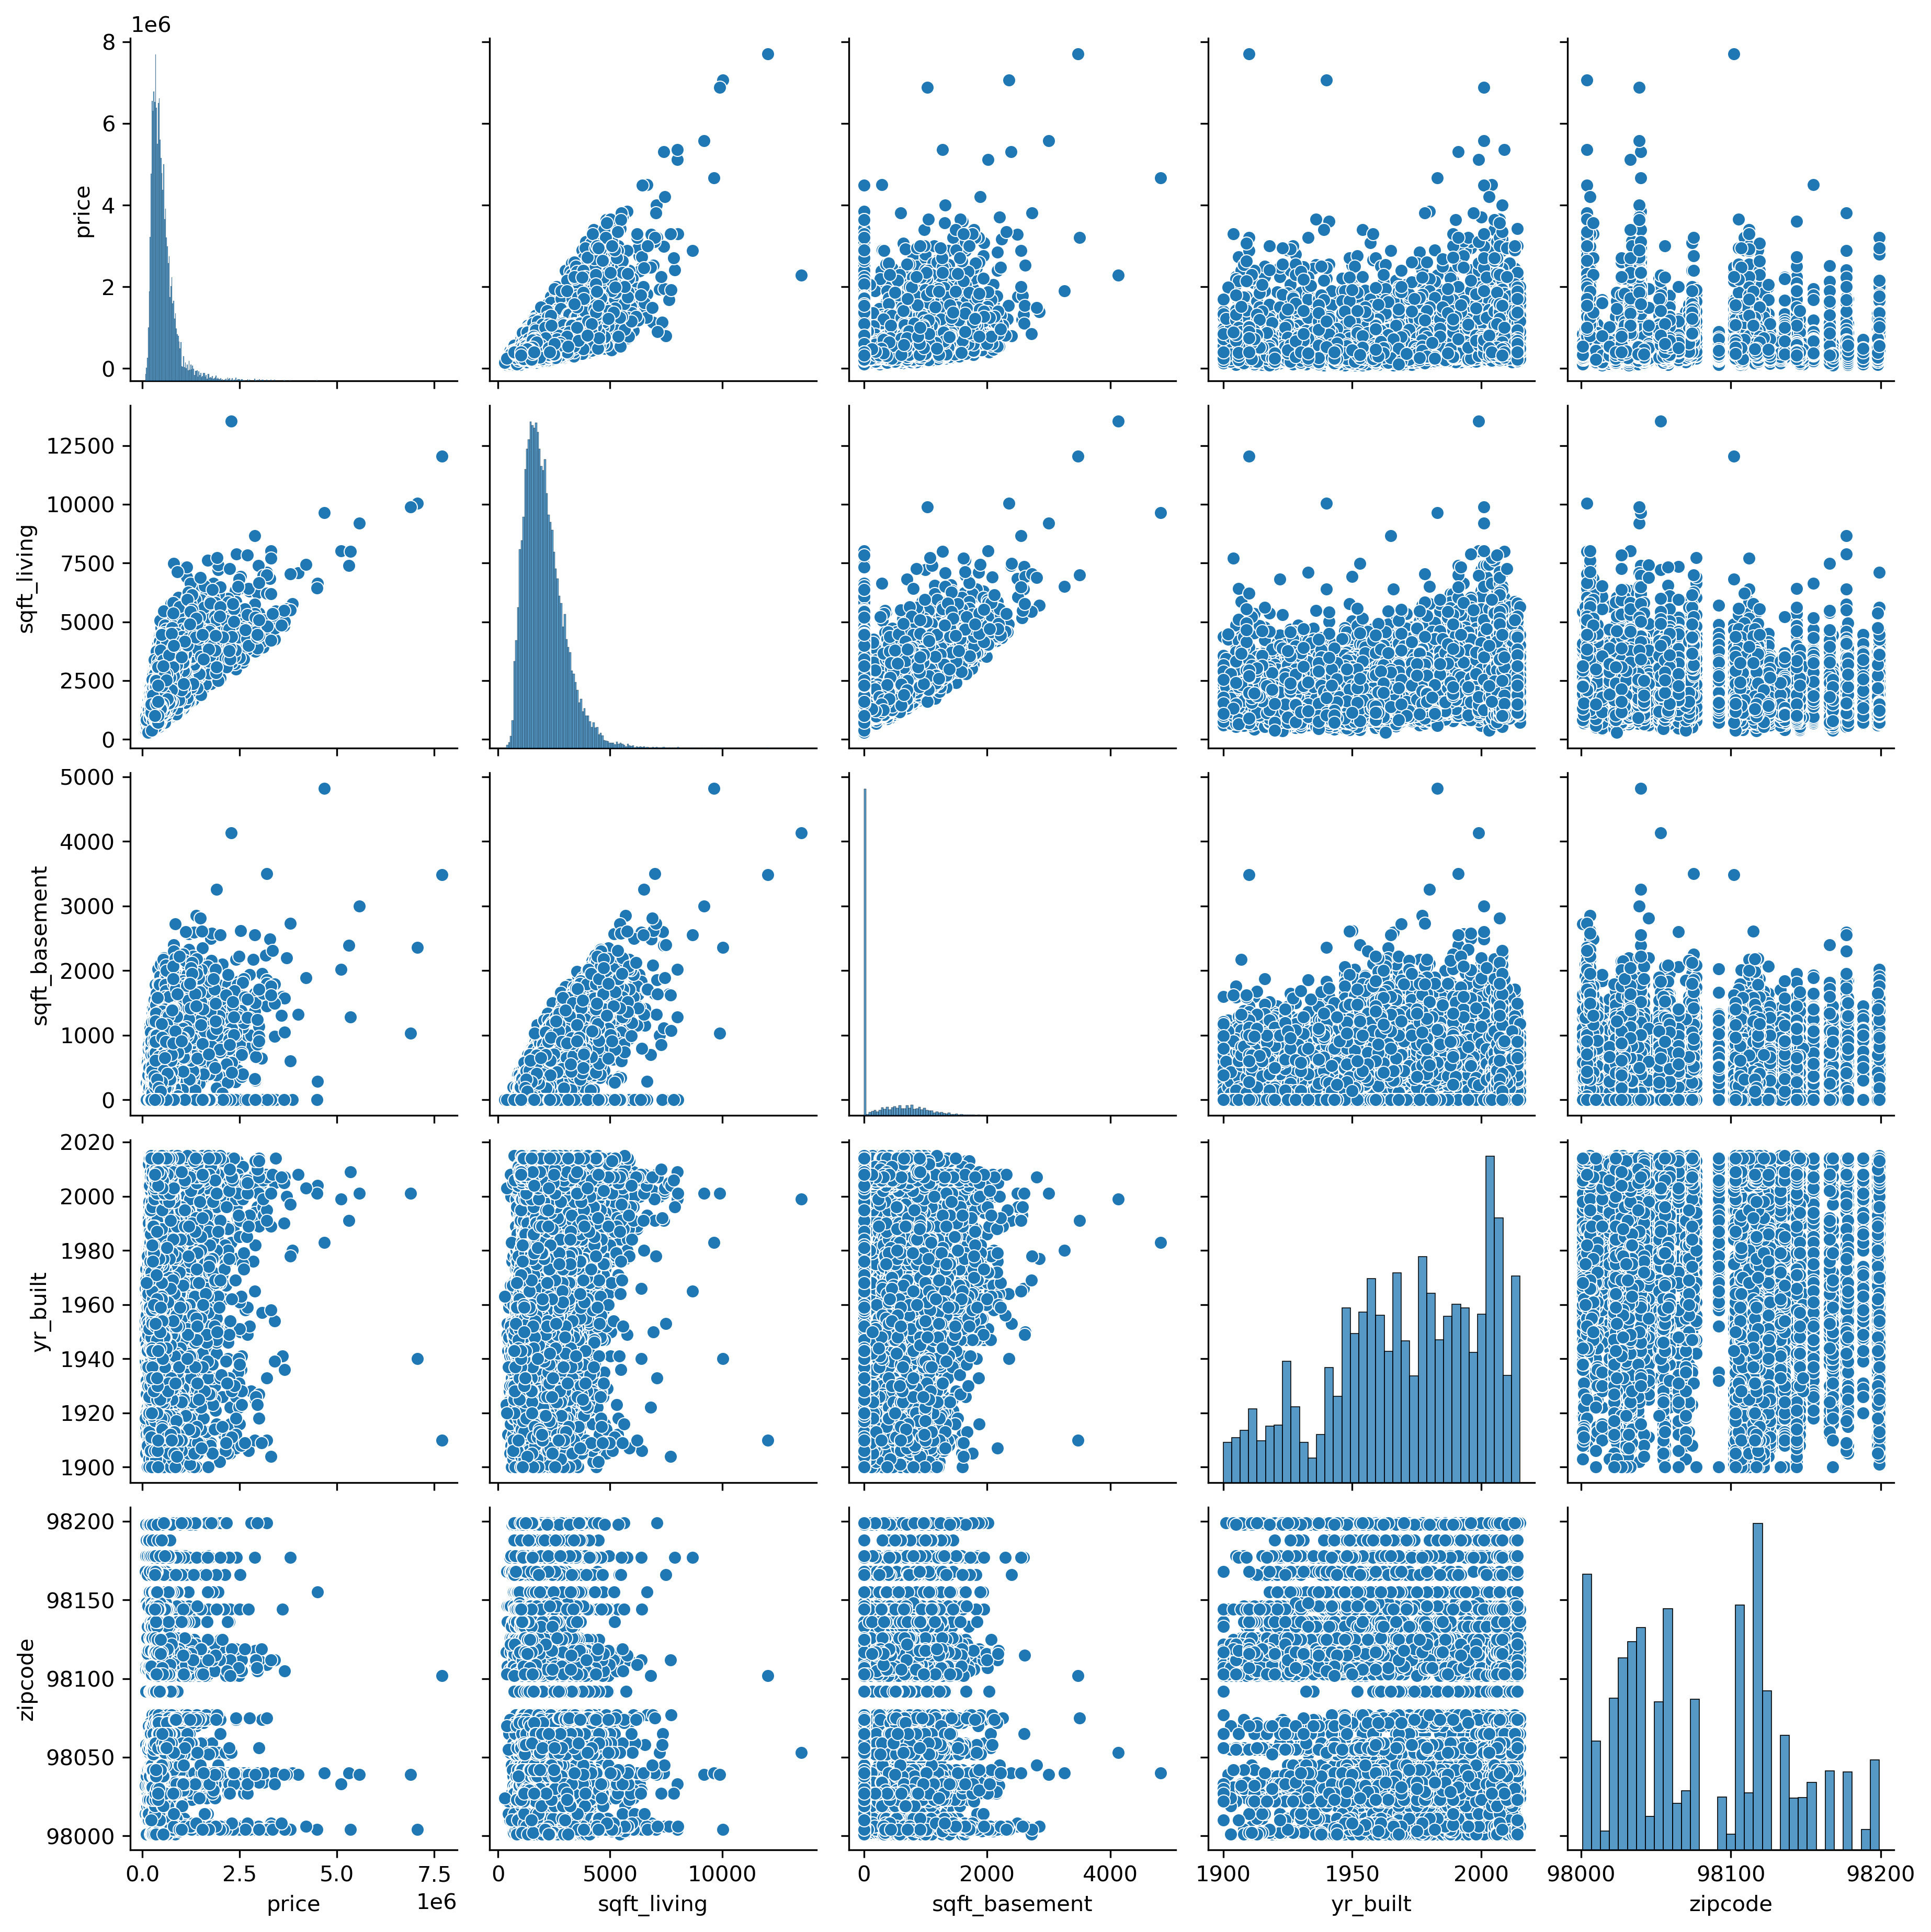

In [5]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [29]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [8]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  15129
test data 개수:  6484


In [33]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [10]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

In [11]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.70


In [46]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다. 
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

[6716588.93606431]
[[-3.84620149e+04  4.87178124e+04  1.16132245e+02  1.86384858e-01
   1.72725055e+03  6.06176047e+05  5.40809610e+04  2.42868089e+04
   9.42313757e+04  7.84686416e+01  3.76636039e+01 -2.73801622e+03
   8.82439566e+00 -5.83134783e+02  5.97934259e+05 -2.18967704e+05
   1.36605655e+01 -5.02414128e-01]]


In [50]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2128.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:13:07   Log-Likelihood:            -2.0627e+05
No. Observations:               15129   AIC:                         4.126e+05
Df Residuals:                   15111   BIC:                         4.127e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.717e+06   3.51e+06      1.911      0.056   -1.71e+05    1.36e+07
bedrooms      -3.846e+04   2219.006    -17.333      0.000   -4.28e+04   -3.41e+04
bathrooms      4.872e+04   3869.943     12.589      0.000    4.11e+04    5.63e+04
sqft_living     116.1343      2.728     42.579      0.000     110.788     121.481
sqft_lot          0.1864      0.055      3.363      0.001       0.078       0.295
floors         1727.2506   4332.602      0.399      0.690   -6765.173    1.02e+04
waterfront     6.062e+05   2.05e+04     29.600      0.000    5.66e+05    6.46e+05
view           5.408e+04   2592.324     20.862      0.000     4.9e+04    5.92e+04
condition      2.429e+04   2832.812      8.573      0.000    1.87e+04    2.98e+04
grade          9.423e+04   2575.374     36.589      0.000    8.92e+04    9.93e+04
sqft_above       78.4666      2.682     29.253      0.000      73.209      83.724
sqft_basement    37.6616      3.176     11.858      0.000      31.436      43.887
yr_built      -2738.0162     86.924    -31.499      0.000   -2908.397   -2567.635
yr_renovated      8.8244      4.444      1.986      0.047       0.113      17.536
zipcode        -583.1348     39.674    -14.698      0.000    -660.901    -505.369
lat            5.979e+05   1.29e+04     46.240      0.000    5.73e+05    6.23e+05
long           -2.19e+05   1.56e+04    -14.021      0.000    -2.5e+05   -1.88e+05
sqft_living15    13.6606      4.126      3.311      0.001       5.573      21.748
sqft_lot15       -0.5024      0.088     -5.731      0.000      -0.674      -0.331
==============================================================================
Omnibus:                    13449.897   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1600950.844
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      52.824   Cond. No.                     2.65e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다중회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [31]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[1.94963717e+10]
[[ 6.00181609e+06 -1.06725986e+07  1.67655131e+04 -2.81521836e+02
  -4.53123138e+07  9.83248125e+07  1.03262965e+07  2.15861827e+06
  -1.52619475e+07  3.14903128e+04 -3.62239358e+04  7.37002866e+04
   3.26055557e+04 -4.54539776e+05  1.07098579e+08 -3.96882821e+06
  -1.32841108e+04  4.09506280e+02  9.24876532e+02  3.28599290e+03
  -5.12524937e+01  1.69812600e-01  2.53534056e+04 -5.00701711e+04
   6.34885886e+03 -4.32624422e+03  2.23700840e+03  9.47286797e+00
   3.24072280e+01 -1.20105582e+02 -4.59424333e+00  6.93331514e+01
  -2.34974547e+04  9.37417855e+04  1.35706912e+01  1.33653063e-02
  -5.07624274e+03  1.89367706e+01 -6.31191321e-01 -2.74618759e+04
   1.07173461e+05 -6.32002896e+03 -7.87182950e+03  1.23538522e+04
   1.20793611e+01  7.89018641e+00  1.51825618e+02 -5.61068723e+00
  -6.33601557e-01  3.44021096e+04 -7.16147756e+04 -4.45412277e+00
   4.83717129e-01 -2.39626413e+02  2.21905801e+02  8.58871616e-01
   1.19017779e+02 -1.39217889e+01  1.28259560e+01  2.926158

In [32]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.83
테스트셋 R-Square: 0.81


In [76]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge01.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge01.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

ridge_train R2: 0.698
ridge_test R2: 0.702
ridge001_train R2: 0.698
ridge001_test R2: 0.702
ridge100_train R2: 0.690
ridge100_test R2: 0.695


In [104]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279807691659095.94, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279783777695082.88, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375252665108844.75, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.698
lasso_test R2: 0.702
num_of_IV: 18
lasso001_train R2: 0.698
lasso001_test R2: 0.702
num_of_IV: 18
lasso10000_train R2: 0.627
lasso10000_test R2: 0.630
num_of_IV: 12


In [106]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414278854047929.25, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467677318872136.44, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.619
lasso_test R2: 0.620
num_of_IV: 18
elast001_train R2: 0.546
elast001_test R2: 0.543
num_of_IV: 18
elast10000_train R2: 0.627
elast10000_test R2: 0.630
num_of_IV: 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375252665108844.75, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(


In [89]:
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
Lasso001 = Lasso(alpha=0.5, max_iter=1000000).fit(x_train, y_train)
# Lasso100 = Lasso(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출


print("ridge001_train R2: {:.3f}".format(Lasso001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(Lasso001.score(x_test, y_test)))

ridge001_train R2: 0.698
ridge001_test R2: 0.702


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279795606820172.28, tolerance: 204578665980.32022
  model = cd_fast.enet_coordinate_descent(
